In [2]:
# importing necessaries libs to explore tha data and build the ML model
# data analysis manipulation
import pandas as pd
import numpy as np
import string

# data viz
from matplotlib import pyplot as plt
import seaborn as sns

# get better visualisation on Jupyter
%matplotlib inline

In [3]:
# read datasets
train = pd.read_csv('/home/viktor/Documentos/DED/train.csv')
test = pd.read_csv('/home/viktor/Documentos/DED/test.csv')

# display dataframe description
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# display a sample
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#dividing categorical and numeric features
num = train[['Age','SibSp','Parch','Fare']]
cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [6]:
#display statistical describe for numeric columns
round(train.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
#display statistical describe for categoric columns
cat.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,CA. 2343,G6,S
freq,577,7,4,644


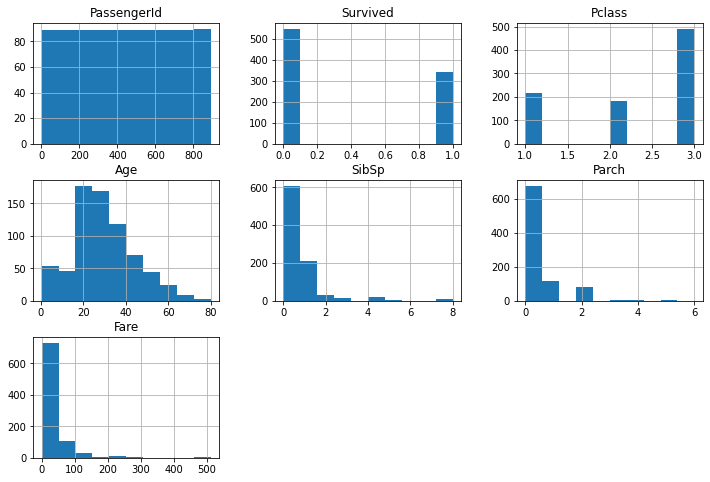

In [8]:
# checking distribution
train.hist(figsize=(12,8))
plt.show()

In [9]:
# creating a new feature
train['Family']=train['SibSp']+train['Parch']+1

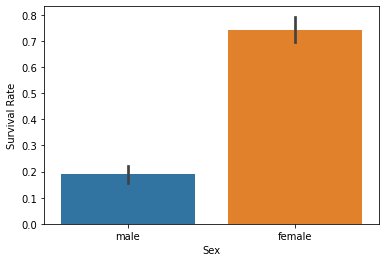

In [9]:
#Survival rate considering passenger's sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.show()

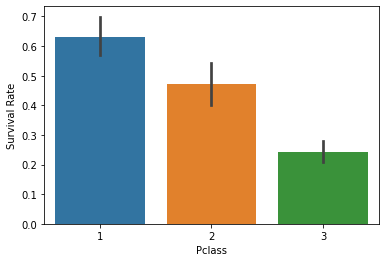

In [10]:
#Survival rate considering passenger's sex
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.show()

#### Pessoas da 1 classe têm mais chances de sobreviver.

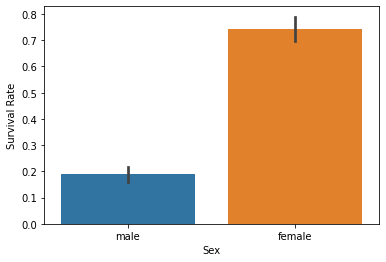

In [11]:
#Survival rate considering Sex and Pclass
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.show()

#### Pessoas do sexo Feminino têm mais chances de sobreviver.

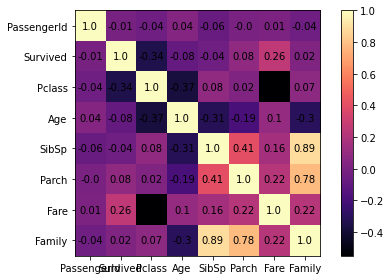

In [12]:
#verifying if we've correlated features between them
train_corr = round(train.corr(), 2)

# visualisation
fig, ax = plt.subplots()
img = ax.imshow(train_corr, cmap='magma')

cbar = ax.figure.colorbar(img, ax=ax)

ax.set_xticks(np.arange(len(train_corr.columns)))
ax.set_yticks(np.arange(len(train_corr.index)))

ax.set_xticklabels(train_corr.columns)
ax.set_yticklabels(train_corr.columns)

for x in range(len(train_corr.columns)):
    for y in range(len(train_corr.index)):
        ax.text(y, x, train_corr.iloc[y, x], ha='center', va='center', color='k')
        fig.tight_layout()   

plt.show()

### É possível identificar na visão acima, que há correlação entre os campos "Fare" e "Family_Size".
### A feature "Survived" também possuem correlação com os campos Fare e Family_Size.

- - - - - - - - - - - - - - - - -

In the report above, it's possible to identify correlation features, comparing one by one.

The 'Survived' feature has a high correlation score with Fare and Family_Size
The Fare has a high score correlation with Family_Size


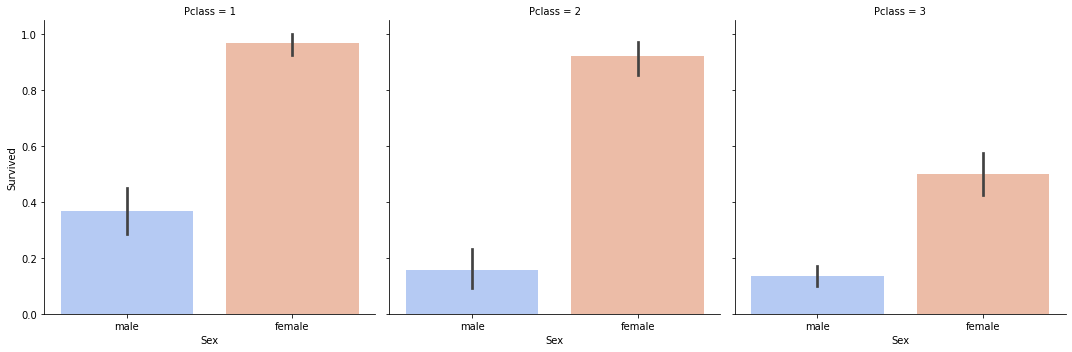

In [13]:
# in each class, how much of each gender has highest survival rate
sns.catplot(x='Sex', y='Survived', col='Pclass', data=train, palette='coolwarm', kind='bar')
plt.show()

Mulheres, independente da classe, possuem maior taxa de Sobrevivência que os homens.

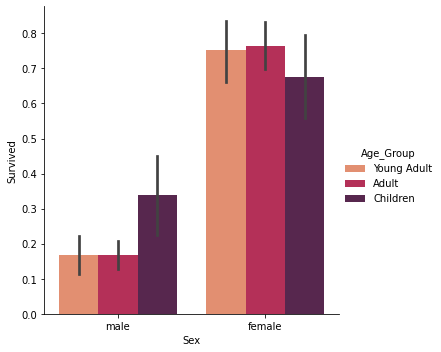

In [14]:
# create a group Age to simplify

def convert_age(age):
    if age <= 18:
        return 'Children'
    elif age in range(19, 32):    
        return 'Young Adult'
    else:
        return 'Adult'

# create feature
train['Age_Group'] = train['Age'].map(convert_age)

#visualisation
sns.catplot(y='Survived', x='Sex', hue='Age_Group', data=train, palette='rocket_r', kind='bar')
plt.show()

Crianças do sexo masculino tiveram maior taxa de sobreviência que homens de outras idades.

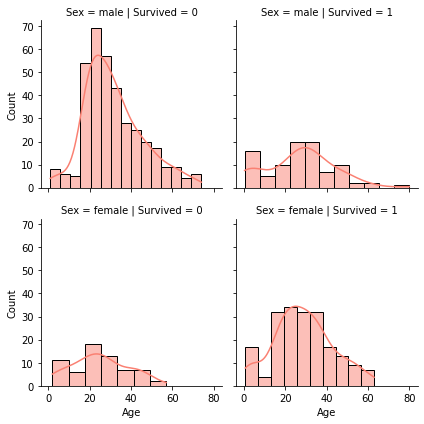

In [15]:
# inflcuency that both age and sex have to Survival Rate
df= sns.FacetGrid(train, col='Survived', row='Sex')
df.map_dataframe(sns.histplot, data=train, x='Age', color='salmon', kde=True)

plt.show()

#### É possível identificar que tanto a idade quanto o sexo influenciou na taxa de sobreviência, como as crianças (no pico ao lado esquerdo do gráfico) quanto pessoas do sexo feminino.

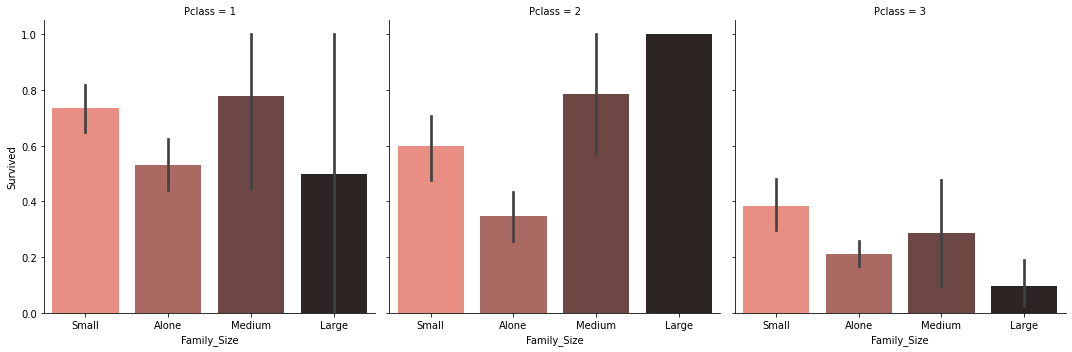

In [16]:
 # get value 1 for people who was alone and 2 for more in order to simplify our view
def convert_fam(fam):
    if fam == 1:
        return 'Alone'
    elif fam in range (2, 4):
        return 'Small'
    elif fam in range (4, 6):
        return 'Medium'
    else:
        return 'Large'

#create feature
train['Family_Size'] = train['Family'].map(convert_fam)

# Survival rate considering pclass and family
sns.catplot(x='Family_Size', y='Survived', col='Pclass', data=train, kind='bar', palette='dark:salmon_r')
plt.show()

Familías com mais de 5 membros que viajaram na 3 classe tiveram menor chance de sobreviver.
Famílias com mais de 5 membros que viajaram na 2 classe tiveram a maior chance de sobreviver entre todos.

Conclusions:

-> Group from Female sex has a highest Survival Rate than Male passengers.

-> Female group in every classes has a highest Survival Rate then Male passengers, altough there are more 'Male' over 'Female'

-> Children 'til 18 years old have more chances to Survive than other groups, even this group has the lowest passenger members.

-> Families with more than 5 members in 2st Class have a highest Survival Rate across the classes.

-> Small families from 3st class have more chances to survive than others.

-> Medium families from 1st class have more chances to survive than others.